# Project description
We wil perform consumer data analyisis using a subset of 500 customer from telecom operator Megaline. Megaline offers customers two prepaid plans, Surf and Ultimate. The main objectives are to know:
- Features which define users and their usage - "describe customer behavior"
- Does the average revenue differ between plans
- Does the average revenue from NY-NJ differ from other states

An additional piece of analysis we will conduct is centered around churn and we will conduct it during preprocessing of the user information dataset 


**Note:**

Megaline rounds seconds up to minutes, and megabytes to gigabytes.
For calls, each individual call is rounded up: even if the call lasted just one
second, it will be counted as one minute. For web traffic, individual web
sessions are not rounded up. Instead, the total for the month is rounded up. If
someone uses 1025 megabytes this month, they will be charged for 2
gigabytes

# Overall Conclusion
## Preprocessing
- 3 useage dataset, 1 Customer infomation dtaset, 1 plan information dataset
The three plan usage datasets are similarly formatted
- Pivoted the datasets in order to perform analysis by date
- Some inconsistent user_ids across the datasets e.g. many more customers used megabytes but not messages
- Customer infomation dates columns indicate many users signed on throughout the year while na churn dates indicate they are still customers 

## Churn
- Churners only account for 6.8% of the dataset
- Highest regitration months are June and August while highest churn rates are in November December and among churners the average lifetime is 141 days from registration to churn
- 18-35 year-olds have trhe highest churn rate of 29%-43% higher than other age groups and may acount for purchase and churn spikes in June/August and November december
- Southern states and Southern region has the highest counts of customers /churners
- Overall state and region population appears to play a part in customer count but customer count does not appear to impact churn ratio
- While existing customers have a slightly higher monthly average 83 USD compared to Ultimate user 82 USD when the distribution of monthly charges is plotted we can see that a group of users who churned that had average monthly charges around 120-170 USD
- However there are other factors at play as we can also see considerable amount of churned users who have average monthly charges of 50-100 USD


## Describe Customer Behavior 
### Usage by Plan Cat/State/Region/Age 
- **Overall usage is much the same across all features in the dataset below is a list of some noted differences**
- Ultimate users send more more messages per month on average, however, there is more spread/variance among this group than with surf users
- Average call counts is almost identical across both plan categories in terms of quantity and spread. However surf users make longer calls on average and their usage is also more varied
- Conversly to average minutes - ultimate users spend longer online using more mbs on average
- Though usage across the 4 metrics appears to have slight distinctios between plan categories, in particular for minutes and mbs, the t-stat is too low and p-value too high to be able to reject the null hypthiesis. Resampling is likely to produce varied results, the sample size may be too small, imbalanced towards surf users (unless this ratio represents the Megalines customer population - unclear) 

Age
- Samle sizes are relativly balanced among age groups
- Age group feature overalll has a low effect size however some slight fluctuations warrented an intergroup t-test to highoight the fluctuations 
- Interestingly enough the 55-65 group tend to make more calls and use more megabytes than most, including the 18-35 demographic
- Conversly the 65+ consume the least across all metrics conpared to all other age groups they also represent the lowest label count across all metrics with fewer 65+ sending text messages than any other group

Region
- While there are some differences noted below at stage 3 "Usage Notes" overall we can not reject the null hypothesis for this feature as there is no clear statistically signifigant differences among the region feature as a whole
- However there are some inter-region differences with moderate effect size most notably for calls and mins bwteen Southeast and Midwest ith the latter spending making more call and longer calls this could be used for region dependant marketing purposes
- Overall feature labels are imbalanced with ratio close to 1:3 & 1:6 between regions with the fewesr customer in the intermountain and midwest regions - lower populations/worse service/regional advertising limitations?


## Does Average Revenue Differ Between Plans
- **Yes surf users create more revenue despite a lower base tariff**
- Surf users cost on average 16 USD more per month than ultimate users
- Surf users tend to exceed there limits and create high monthly tariffs
- We also see a much higher dispersion of charges among surf users with Std. Dev. 44 USD versus 8 USD for ultimate users
- Checking the T-stat and p-value against students ttest table we can see this is a statistically significant distribution and we can be confident to see the same or very similar results reflected in Megalines total customer base
Students ttest table https://www.itl.nist.gov/div898/handbook/eda/section3/eda3672.htm
- Side note - if the plan ratio of this sample is reflective of Megalines overall customer plan ratio then there is also more the 2x the number of surf users futher increasing Megaline surf plan revenue


## Does the average revenue from users in NY-NJ area differ from other areas 
- **Yes average revenue is higher here than in several states however sample size is an issue**
- Average revenue from NY-NJ is higher than NE-IA, SC, VA, and NV and lower than NM
- The most robust comparisons can be made between SC and NV which have 7 enteries each as opposed to the two by other states with high t_stats
- In total there are 18 states whose T-stat indicates they have a lower average monthly revenue and 23 who have a higher average
- Overall though, despite some low p-values, most sample sizes, especially among states with the largest effect size versus NY-NJ are too small to draw conclusions
- Most states do not have a statisically significant effect size on revenue
- States with less ultimate users bring in less revenue as surf users who, despite having lower base tariff, cost more on average due to excess charge






# **1. Data Preprocessing and Analysis Breakdown**


In [ ]:
# Import the nesseacry libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
import warnings

In [ ]:
# Load all the datasets and review the datatypes
call_df = pd.read_csv("data/megaline_calls.csv")
net_df = pd.read_csv("data/megaline_internet.csv")
msg_df = pd.read_csv("data/megaline_messages.csv")
plan_df = pd.read_csv("data/megaline_plans.csv")
user_df = pd.read_csv("data/megaline_users1.csv")

In [ ]:
# Looping through the datasets and printing the first few rows
datasets = [call_df, net_df, msg_df, plan_df, user_df]
datasetstr = ['call_df', 'net_df', 'msg_df', 'plan_df', 'user_df']

for ds in datasets:
  display(ds.head())
  print()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [ ]:
# Looping through the datasets and displaying the info
for ds in datasets:
  display(ds.info())
  print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   tariff      500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

# **1. Data Preprocessing and Analysis Breakdown Conclusion**
- Due to the nature of the datasets we will perform more thorough analysis of numerical features during useage dataset exploration
- 3 useage dataset, 1 Customer infomation dtaset, 1 plan information dataset
- The three plan usage datasets are similarly formatted
    - Will need to pivot the datasets in order to perform analysis by date
    - All usage it formatted in float
    - Most likely some inconsistent user_ids across the datasets e.g. a customer who used minutes but not messages - will test later
    - Need to convert dates to datetime
    - convert floats to ints once rounded up for each dataset and according to Megaline rounding/charging policy
    - We have the charges specific to each plan 
- Customer infomation dtaset User details is missing some churn dates most likely these are still customers - can create a boolean or 0/1 column to indicate churners
- Need to convert all date featiures to datetime dtype
- Need to parse out customer state from address


# **2. Preprocessing & Churn Exploration - user_df**
- Lets explore churn a little bit in the process of preparing this dataset
  - We can return to this later and assess whetehr total usage has an impact on churn
- We wont use statisitical models here its just a visual exploration during preprocess of this dataset
- Formatting reg and churn cdate columns
- Creating a isChurned column
- Categorizing customer age and state columns
- Creating reg and churn month variables for plotting
- Creating Days on Policy column

In [ ]:
address = user_df['city'].str.rsplit(" ", 2, expand=True)
user_df['state'] = address[1]
user_df['address'] = address[0]

- Parsing the state and city for grouping comparisons

In [ ]:
user_df['reg_date'] = pd.to_datetime(user_df['reg_date'],yearfirst=True)
user_df['churn_date'] = pd.to_datetime(user_df['churn_date'],yearfirst=True)

- Converting registration and churn date columns to datetime 

## Churn Overview 

0    0.932
1    0.068
Name: isChurned, dtype: float64


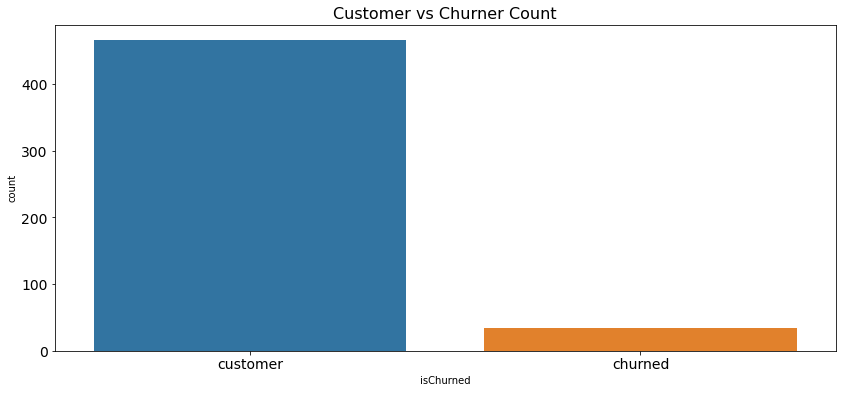

In [ ]:
user_df['isChurned'] = np.where(user_df['churn_date'].isna(), 0, 1)
print(user_df['isChurned'].value_counts(normalize=True))
viz = sns.countplot(x=user_df['isChurned'])
viz.figure.set_size_inches(14,6)
viz.set_title("Customer vs Churner Count", fontsize=16)
viz.set_xticklabels(['customer', 'churned'], size = 14)
viz.set_yticklabels(range(0,500,100), size = 14);

- Creating isChurned column for counts
- np.where(condition, value if condition is true, value if condition is false)
- Printing churn ratio
- Plotting churn counts

## Churn by Date

####
AVERAGE TIME BEFORE CHURN: 141.65 DAYS
####


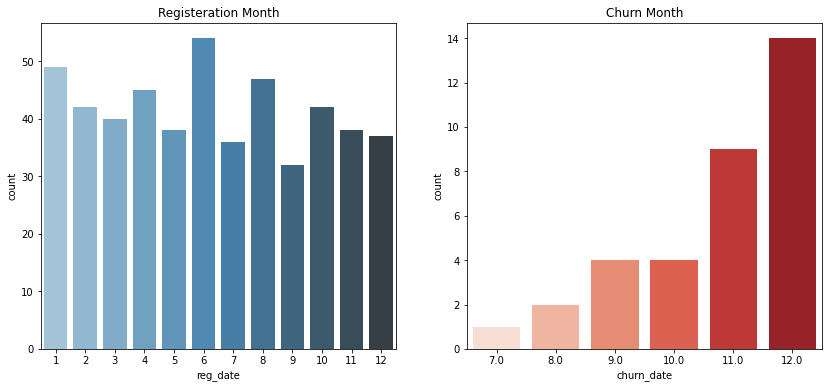

In [ ]:
# Counting and averaging days from sign on to churn
user_df['days_on_policy'] = (user_df['churn_date'] - user_df['reg_date']).astype(str).str.split(" ", expand=True)[0].replace('NaT', np.nan).astype(float)
churn_avg_days = round(user_df['days_on_policy'].mean(), 2)
print("####")
print("AVERAGE TIME BEFORE CHURN:", churn_avg_days,'DAYS')
print("####")


# Extracting sign on and churn months
reg_month = user_df['reg_date'].dt.month
churn_month = user_df['churn_date'].dt.month

# Plotting churn months and printing average time on plan
fig, ax = plt.subplots(1, 2)
sns.countplot(x=reg_month, ax = ax[0], palette='Blues_d')
sns.countplot(x=churn_month, ax = ax[1], palette='Reds')
ax[0].figure.set_size_inches(14,6)
ax[0].set_title("Registeration Month")
ax[1].set_title("Churn Month")
plt.show()

- Counting and averaging days from sign on to churn
- Extracting sign on and churn months
- Plotting churn months and printing average time on plan


## Churn By Date Conclusion
- January, June, and August have the highest sign on month and December highest churn month with an average of 141 days between churners signing on and churning meaning churners most likely sign on in June and August and Churn in Novermber and December
- New plans released or new phones being bought christmas that need new sims, new year, new plan
- What event is happening in the summer months and why is July so low - student summer vacation - will visualize churn age 
- **Note** Users who signed on in February onward should only be charged the tarrif from their sign on month and not before. Thios should be reflect in the useage across the datasets


## Churn by Age



Churn by Age Group (%): 
18-35    0.352941
35-50    0.205882
50-65    0.235294
65+      0.205882



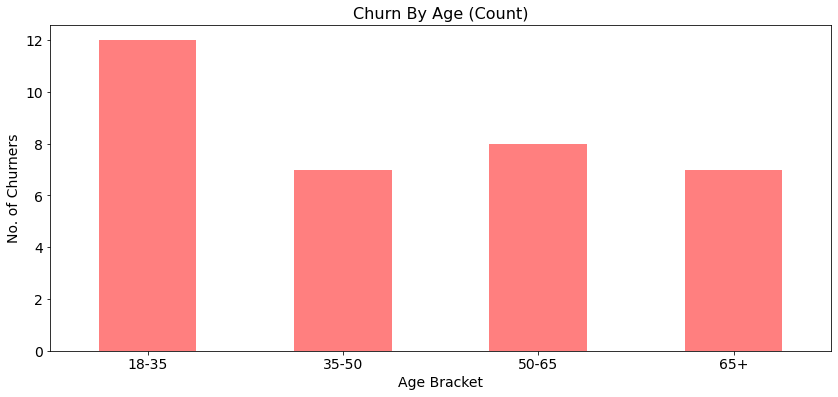

In [ ]:
# Plotting the total number of churners by age bracket
# churn_by_age = user_user_user_df.groupby('age')['isChurned'].sum()
user_df['age_bracket'] = pd.cut(user_df['age'], bins=[0, 35, 50, 65, 100], labels=['18-35', '35-50', '50-65', '65+'])


churn_by_age = user_df.groupby('age_bracket')['isChurned'].sum()
print('Churn by Age Group (%):', str(churn_by_age / sum(churn_by_age))[11:-31])


churn_by_age.plot(kind = 'bar', figsize=(14,6), color='red', alpha=0.5)

plt.xticks(rotation=90)
plt.ylabel('No. of Churners', fontsize=14)
plt.xlabel("Age Bracket", fontsize=14)
plt.xticks(fontsize=14, rotation=0)
plt.yticks( fontsize=14)
plt.title("Churn By Age (Count)", fontsize=16);

- Plotting the total number of churners by age bracket

## Churn by Age Conclusion
- Highest age-group for churn is under 35's with almost churning at between 43%-29% igher rate than other age groups 
- Circumstantial evidence to support the hypothesis that students account for the high purchase and churn rates in June/August and November/December respectivly

## Churn by Location

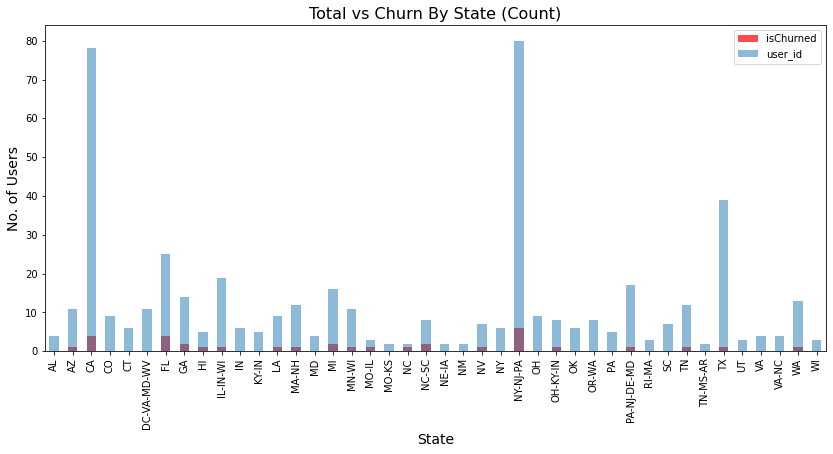

In [ ]:
# Plotting the total number of plans against the number of churns
churn_by_state = user_df.groupby('state')['isChurned'].sum()
total_by_state = user_df.groupby('state')['user_id'].count()

churn_by_state.plot(kind = 'bar', figsize=(14,6), color='red', alpha=.7)
total_by_state.plot(kind = 'bar', figsize=(14,6), alpha =0.5)

plt.xticks(rotation=90)
plt.ylabel('No. of Users', fontsize=14)
plt.xlabel("State", fontsize=14)
plt.title("Total vs Churn By State (Count)", fontsize=16)
plt.legend();

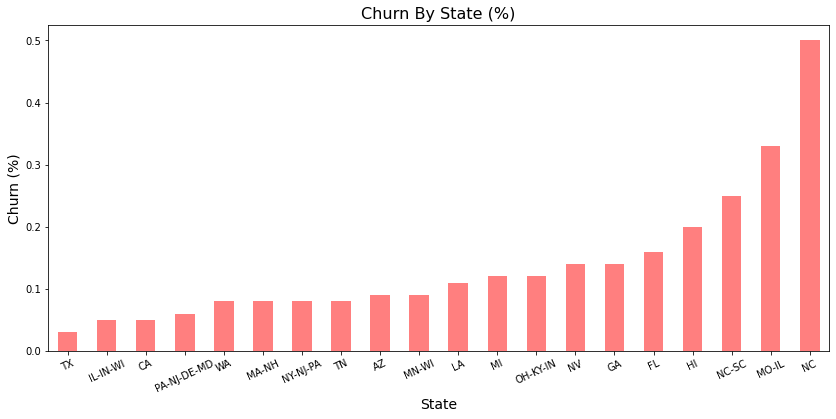

In [ ]:
# Churn percentage
churn_by_state_perc = (churn_by_state / total_by_state).round(2).sort_values()
# Plotting churn percentage
churn_by_state_perc[22:].plot(kind = 'bar', figsize=(14,6), color='red', alpha=0.5)
plt.xticks(rotation=25)
plt.ylabel('Churn (%)', fontsize=14)
plt.xlabel("State", fontsize=14)
plt.title("Churn By State (%)", fontsize=16);

# Churn By Location Conclusion
- Highest churn counts CA, FL, NY-NJ  - the latter state will come into play again later per the brief "Does average revenue from users in NY-NJ area is different from that of the users from other regions"
- However, highest ratio of churn to retention NC, MO-IL, HI, NC-SC, FL, GA
- Seem like US southern states have a higher churn - lets group by region and test

## Churn By US Region

In [ ]:
# Mapping states to region per wikipedia
# https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States
region_dict = {}

region_dict['northeast'] = ['NY-NJ-PA', "PA-NJ-DE-MD", 'NY', 'CT', 'MA-NH',"RI-MA", 'DC-VA-MD-WV', 'PA', 'MD']   
region_dict['midwest'] = ['OH', 'OK', 'MI', 'IL-IN-WI', 'MO-IL', 'NE-IA', 'MO-KS', 'MN-WI', 'WI', 'UT']
region_dict['southeast'] = ['TX','NC-SC', 'NC-VA', 'GA', 'FL', 'TN', 'KY-IN', 'TN-MS-AR', 'LA', 'IN', 'VA-NC', 'AL', 'NC', 'OH-KY-IN', 'SC', 'VA']
region_dict['pacific'] = ['CA', 'NV', 'OR', 'WA', 'HI', 'OR-WA']
region_dict['intermountain'] = ['NM', 'CO', 'AZ']

# Extracting user region counts from user state column
region_list=[]
for row in user_df['state']:
  for k, v in region_dict.items():
    for el in v:
      if el == row:
        region_list.append(k)

user_df['region'] = region_list

Churn % By Region
region
intermountain    0.05
midwest          0.07
northeast        0.06
pacific          0.06
southeast        0.09
dtype: float64


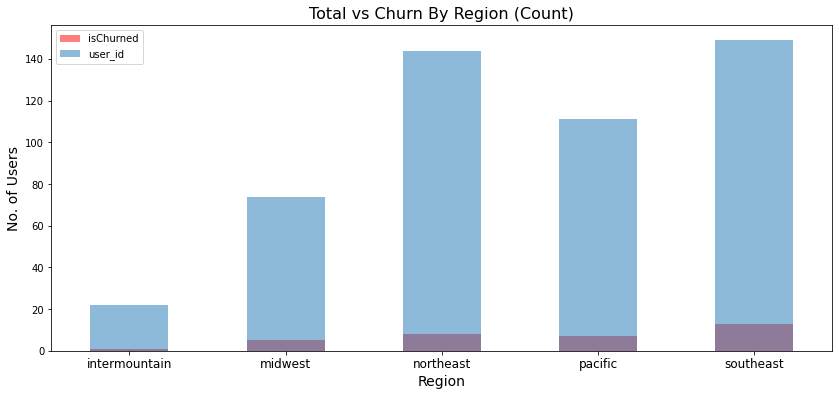

In [ ]:
# Plotting the total number of plans against the number of churns
churn_by_region = user_df.groupby('region')['isChurned'].sum()
total_by_region = user_df.groupby('region')['user_id'].count()
print('Churn % By Region')
print(round(churn_by_region / total_by_region, 2))
churn_by_region.plot(kind = 'bar', figsize=(14,6), alpha =0.5, color='red')
total_by_region.plot(kind = 'bar', figsize=(14,6), alpha =0.5)

plt.xticks(rotation=0, fontsize=12)
plt.ylabel('No. of Users', fontsize=14)
plt.xlabel("Region", fontsize=14)
plt.title("Total vs Churn By Region (Count)", fontsize=16)
plt.legend();

## Churn By US Region Conclusion
- As suspected Southeast has the highest customer counts, churner count, and highest churn ratio at 9%
- However region does not appear to play a significant factor in churn ratio as all regions are very similar 5%-9% with intermountain being the lowest across both counts
- Customer count is also reflected in region population - with exception to Pacific

### Populations
- Southeat 118M
- Northeast 97M
- Miodwest 65M
- Pacific 54M
- Intermountain 22M
- All Pop data retrived from
https://worldpopulationreview.com/state-rankings/

# **2. Preprocessing Churn Exploration user_df Conclusion**
- Feature categorization, dytpe conversions, and feature extractions completed
- Churners only account for 6.8% of the dataset
- Highest regitration months are June and August while highest churn rates are in November December and among churners the average lifetime is 141 days from registration to churn
- 18-35 year-olds have trhe highest churn rate of 29%-43% higher than other age groups and may acount for purchase and churn spikes in June/August and November december
- Southern states and Southern region has the highest counts of customers /churners
- States with highest churn counts CA, FL, NY-NJ
- Among Pacific and Midwest regions states like MO-IL and HI the worst offenders
- Overall state and region population appears to play a part in customer count but customer count does not appear to impact churn ratio

# **3. Useage Datasets Formatting**
- Describe the customers' behavior
- Find the minutes, texts, and volume of data the users of each plan require per month
- Calculate the mean, dispersion, and standard deviation
- Plot histogram
- Describe the distributions


In [ ]:
# Creating dictionaries of user_id to plan, age, region for later analysis
# All user_ids and corresponding plan category 
user_plan_dict = dict(zip(user_df['user_id'], user_df['tariff']))
user_age_dict = dict(zip(user_df['user_id'], user_df['age_bracket']))
user_state_dict = dict(zip(user_df['user_id'], user_df['state']))
user_region_dict = dict(zip(user_df['user_id'], user_df['region']))
# List of month names for indexing purposes
months = [1,2,3,4,5,6,7,8,9,10,11,12]

- Creating dictionaries of user_id to plan, age, region for mapping later
- All user_ids and corresponding plan category
- List of month names for indexing purposes 

**Notes:** 
- To investigate true usage we are not rounding up as per Megaline policy we will do this when calculating total tariff
- Per the brief "many calls have a duration of 0.0 minutes. These might be missed calls. Whether or not to preprocess these values is up to you"
  - Megaline states that - "For calls, each individual call is rounded up: even if the call lasted just one second" and per this statement a cal that lasts 0.0 second should not be rounded up so I will not rounf them up
  - The latter part of the brief also states "assess how much their absence would affect the results of your analysis" so as part of the appendic we will revisit the mins_df and print side by side averages, dispersions, std etc...


## Dataset Usage Formatting Function
- Will we create two pivot tables from the call_df one for call count and one for mins as there might be some interesting insights in terms of call count vs call duration

In [ ]:
# Function to change datatypes, format the dataframe into a pivot table, and map values
def monthly_usage(df, date_col, agg_val, agg_func):
    df['month'] = pd.to_datetime(df[date_col]).dt.month
    pivot = df.pivot_table(index='user_id', values=agg_val, columns='month', aggfunc=agg_func, fill_value=0)
    pivot['monthly_avg_count'] = round((pivot[months].sum(axis=1) / 12),2)
    # Map plan category with all user_ids in (msg/call/net) pivot tables
    pivot['plan_category'] = pivot.index.map(user_plan_dict)
    pivot['plan_base_price'] = pivot['plan_category'].replace({'surf':50, 'ultimate':70})
    pivot['age_bracket'] = pivot.index.map(user_age_dict)
    pivot['region'] = pivot.index.map(user_region_dict)
    return pivot

# Creating pivots from each
msg_count = monthly_usage(msg_df, 'message_date', 'message_date', 'count')
call_count = monthly_usage(call_df, 'call_date', 'duration', 'count')
min_count = monthly_usage(call_df, 'call_date', 'duration', 'sum')
net_count = monthly_usage(net_df, 'session_date', 'mb_used', 'sum')

In [ ]:
count_pivots = [msg_count, call_count, min_count, net_count]
titles = ['Msgs Usage Per Month', 'Calls Usage Per Month', 'Mins Usage Per Month', 'MBs Usage Per Month']

for title, pivot in zip(titles, count_pivots):
  print(title)
  display(pivot.head())
  print('\n\n')

Msgs Usage Per Month


month,1,2,3,4,5,6,7,8,9,10,11,12,monthly_avg_count,plan_category,plan_base_price,age_bracket,region
user_id,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,11,0.92,ultimate,70,35-50,southeast
1001,0,0,0,0,0,0,0,30,44,53,36,44,17.25,surf,50,18-35,pacific
1002,0,0,0,0,0,0,0,0,0,15,32,41,7.33,surf,50,35-50,pacific
1003,0,0,0,0,0,0,0,0,0,0,0,50,4.17,surf,50,50-65,midwest
1004,0,0,0,0,7,18,26,25,21,24,25,31,14.75,surf,50,35-50,pacific





Calls Usage Per Month


month,1,2,3,4,5,6,7,8,9,10,11,12,monthly_avg_count,plan_category,plan_base_price,age_bracket,region
user_id,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,16,1.33,ultimate,70,35-50,southeast
1001,0,0,0,0,0,0,0,27,49,65,64,56,21.75,surf,50,18-35,pacific
1002,0,0,0,0,0,0,0,0,0,11,55,47,9.42,surf,50,35-50,pacific
1003,0,0,0,0,0,0,0,0,0,0,0,149,12.42,surf,50,50-65,midwest
1004,0,0,0,0,21,44,49,49,42,61,54,50,30.83,surf,50,35-50,pacific





Mins Usage Per Month


month,1,2,3,4,5,6,7,8,9,10,11,12,monthly_avg_count,plan_category,plan_base_price,age_bracket,region
user_id,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,116.83,9.74,ultimate,70,35-50,southeast
1001,0.0,0.0,0.0,0.0,0.00,0.00,0.00,171.14,297.69,374.11,404.59,392.93,136.70,surf,50,18-35,pacific
1002,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,54.13,359.76,363.24,64.76,surf,50,35-50,pacific
1003,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1041.00,86.75,surf,50,50-65,midwest
1004,0.0,0.0,0.0,0.0,181.58,261.32,358.45,334.86,284.60,341.63,452.98,403.53,218.25,surf,50,35-50,pacific





MBs Usage Per Month


month,1,2,3,4,5,6,7,8,9,10,11,12,monthly_avg_count,plan_category,plan_base_price,age_bracket,region
user_id,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1901.47,158.46,ultimate,70,35-50,southeast
1001,0.0,0.0,0.0,0.0,0.00,0.00,0.00,6919.15,13314.82,22330.49,18504.30,19369.18,6703.16,surf,50,18-35,pacific
1002,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,6552.01,19345.08,14396.24,3357.78,surf,50,35-50,pacific
1003,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,27044.14,2253.68,surf,50,50-65,midwest
1004,0.0,0.0,0.0,0.0,6547.21,20672.82,24516.62,27981.74,18852.72,14541.63,21850.78,21389.29,13029.40,surf,50,35-50,pacific


# **3. Useage Datasets Formatting Conclusion**
- Function worked as expected 
- We have pivoted using user_id as index and month as column and aggreated usage by month
- We can see user_idss that have zero the usage from the start of the year and across several months is indicating that they have signed up at different stages of the year and shouldnt be charged the base tariff where there is zero usage lines up across months for each metric
- We also appended a monthly average usage column
- The mapped plan category and base price will serve us later when creating a total and average tarrif piviot table
- The appended age_bracket and region will allow us to analysis user behavior

# **4. Describe The Customers' Behavior**
## **Describe the customers' behavior - Plan Category Step 1**
### Plan Category Usage Statistics


In [ ]:
count_pivots = [msg_count, call_count, min_count, net_count]
titles = ['Msgs', 'Calls', 'Mins', 'MBs']
g = ['surf', 'ultimate']



for t, p in zip(titles, count_pivots):
  print(t+" Average Monthly Usage By Plan Category")
  print("-----------------------------------")
  print(f"{g[0]} Avg Monthly {t} Count:", round(p[p['plan_category'] == g[0]]['monthly_avg_count'].mean(), 2))
  print(f"{g[1]} Avg Monthly {t} Count:", round(p[p['plan_category'] == g[1]]['monthly_avg_count'].mean(), 2), '\n')
  print(f"{g[0]} Avg Monthly {t} Std Dev:", round(p[p['plan_category'] == g[0]]['monthly_avg_count'].std(), 2))
  print(f"{g[1]} Avg Monthly {t} Std Dev:", round(p[p['plan_category'] == g[1]]['monthly_avg_count'].std(), 2),'\n')
  print(f"{g[0]} Avg Monthly {t} Variance:", round(p[p['plan_category'] == g[0]]['monthly_avg_count'].var(),2))
  print(f"{g[1]} Avg Monthly {t} Variance:", round(p[p['plan_category'] == g[1]]['monthly_avg_count'].var(),2), '\n------------------------------------\n\n')

Msgs Average Monthly Usage By Plan Category
-----------------------------------
surf Avg Monthly Msgs Count: 15.13
ultimate Avg Monthly Msgs Count: 17.07 

surf Avg Monthly Msgs Std Dev: 15.63
ultimate Avg Monthly Msgs Std Dev: 16.77 

surf Avg Monthly Msgs Variance: 244.17
ultimate Avg Monthly Msgs Variance: 281.39 
------------------------------------


Calls Average Monthly Usage By Plan Category
-----------------------------------
surf Avg Monthly Calls Count: 24.05
ultimate Avg Monthly Calls Count: 23.47 

surf Avg Monthly Calls Std Dev: 19.86
ultimate Avg Monthly Calls Std Dev: 19.88 

surf Avg Monthly Calls Variance: 394.5
ultimate Avg Monthly Calls Variance: 395.18 
------------------------------------


Mins Average Monthly Usage By Plan Category
-----------------------------------
surf Avg Monthly Mins Count: 162.75
ultimate Avg Monthly Mins Count: 157.24 

surf Avg Monthly Mins Std Dev: 134.69
ultimate Avg Monthly Mins Std Dev: 133.33 

surf Avg Monthly Mins Variance: 18141.

## **Describe the customers' behavior - Plan Category Step 1 Conclusion**
- Ultimate customers send more text mesages 
- Surf customers make more calls and use more minutes
- Ultimate customers use much more data 
- Usage seems to increate as year progresses
    - data appears biased towards new customers
    - lets visually inspect data usage across each month

## **Describe the customers' behavior - Plan Category Step 2**
### Monthly Usage by Plan Catplot Visualization 
- Messages
- Calls
- Minutes
- Megabytes


In [ ]:
def catplot(df, title):
    viz = sns.catplot(data=df, col='plan_category')
    viz.set_xlabels(fontsize=14)
    viz.set_ylabels(fontsize=14)
    viz.fig.subplots_adjust(top=0.85)
    viz.fig.suptitle(f"{title} by Month/Plan", fontsize=16)
    plt.show()
    print('\n\n')

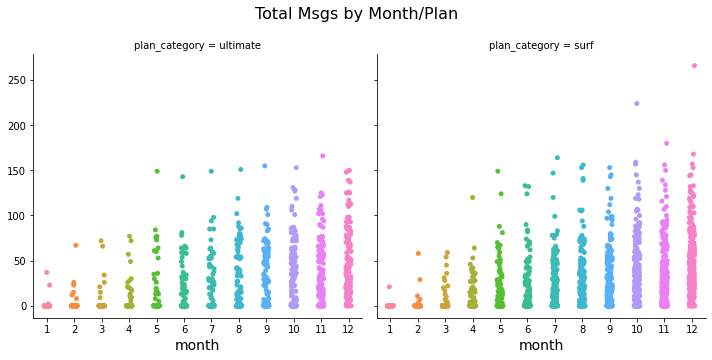

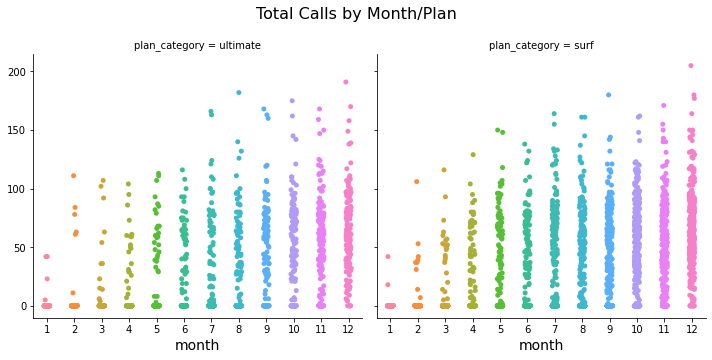

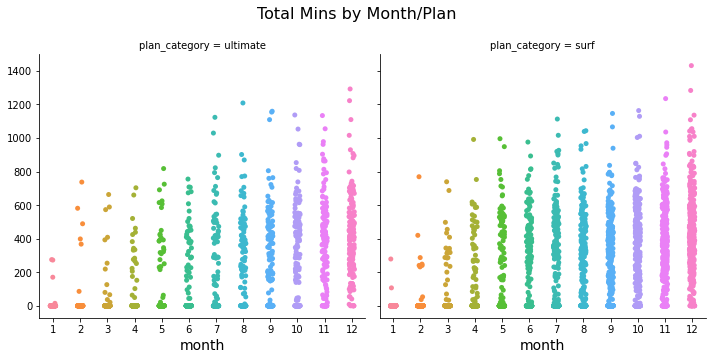

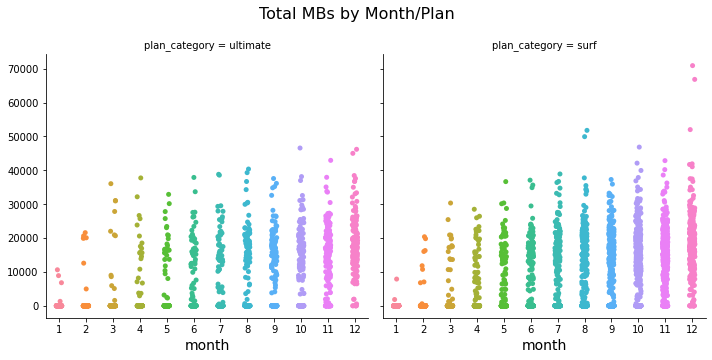

In [ ]:
pivots = [msg_count, call_count, min_count, net_count]
titles = ['Total Msgs', 'Total Calls', 'Total Mins', 'Total MBs']

for p, t in zip(pivots, titles):
  catplot(p.drop(['plan_base_price','monthly_avg_count'], axis=1), t)

## **Describe the customers' behavior - Plan Category Step 2 Conclusion**
- Per the visualization the data does appear to be biased towards new users and churn rates may not reflect the true population regarding long term customer sentiment
- Plot verify mean usage statisics above for msgs, calls, and mins however megabytes true denisty is still an issue with the catplot and surf customers appear to use more megabytes
    - Lets plot density distributions to dive deeper
    - lets score supplement the visualization with an effect size metric using Student T-test or ANOVA depending on label count

## **Describe the customers' behavior - Plan Category Step 3**
### Distplot Average Monthly Usage With T-test/ANOVA Function
- Label count dependant T-stat for features with 2 labels and ANOVA for features > 2 labels
- Much greater insight on density and dispersion differences between plan types

In [ ]:
def distplot(df, cat_col, avg_col, title, hue):
  warnings.filterwarnings('ignore')

  groups = df[cat_col].unique()
  if len(groups) ==2:
    t, p =   stats.ttest_ind(df[df['plan_category'] == 'surf'][avg_col], 
                          df[df['plan_category'] == 'ultimate'][avg_col])
    textstr = f"Students Ttest\nT-stat: {t.round(3)}\np-value: {p.round(3)}"
  
  else:
    group_vals = []
    for g in groups:
      group_vals.append(df[df[cat_col] == g][avg_col])
      

    f, p = stats.f_oneway(*group_vals)
    textstr = f"One-Way ANOVA\nF-stat: {f.round(3)}\np-value: {p.round(3)}"

  for g in groups:
    print(f"Sample Size of {g} Customers Who Used {title}: "+str(len(df[df[cat_col] == g][avg_col])))
    viz = sns.distplot(df[df[cat_col] == g][avg_col], fit_kws=dict(linewidth=2.5))
  

  viz.set_title(f"Average Monthly {title} by {hue}", fontsize=16)
  plt.legend(df[cat_col].unique())
  viz.figure.set_size_inches(12,6)
  viz.set_xlabel(viz.get_xlabel(), fontdict={'size': 14})
  viz.set_ylabel(viz.get_ylabel(), fontdict={'size': 14})
  plt.text(np.quantile(df[df[cat_col] == g][avg_col], 0.9999), 0.00001,  textstr, fontdict={'size': 14})
  plt.show()
  print('\n\n')

Sample Size of ultimate Customers Who Used Msgs: 132
Sample Size of surf Customers Who Used Msgs: 270


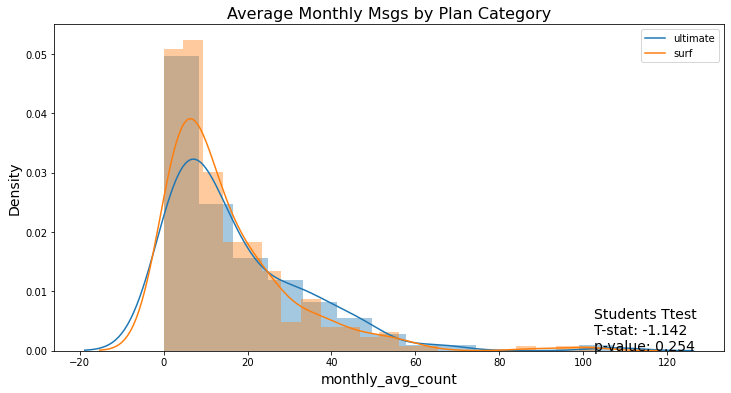




Sample Size of ultimate Customers Who Used Calls: 155
Sample Size of surf Customers Who Used Calls: 326


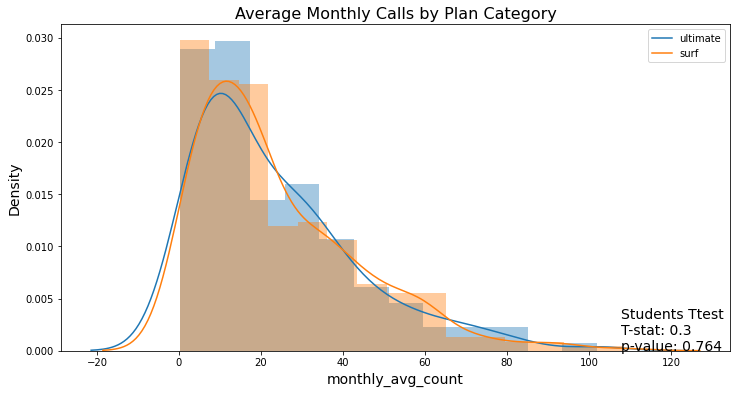




Sample Size of ultimate Customers Who Used Mins: 155
Sample Size of surf Customers Who Used Mins: 326


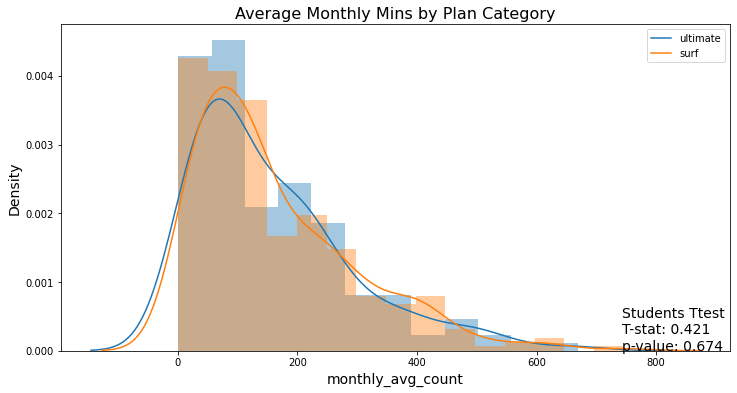




Sample Size of ultimate Customers Who Used MBs: 157
Sample Size of surf Customers Who Used MBs: 332


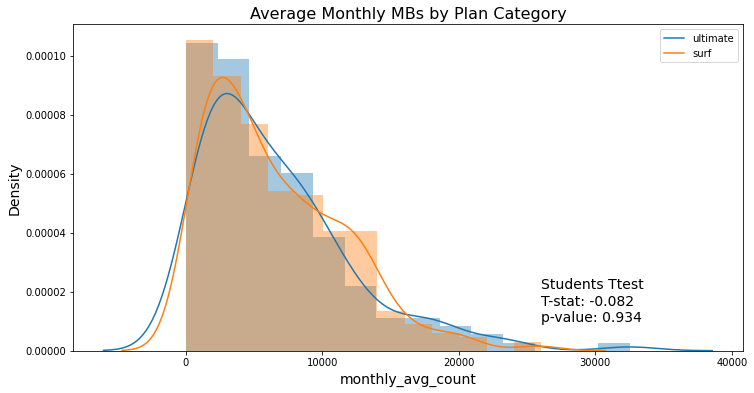

In [ ]:
pivots = [msg_count, call_count, min_count, net_count]
titles = ['Msgs', 'Calls', 'Mins', 'MBs']

for p, t in zip(pivots, titles):
  distplot(p, 'plan_category', 'monthly_avg_count', t, 'Plan Category')

## **Describe the customers' behavior - Plan Category Step 3 Conclusion**
- Slightly greater density can be on the higher end of counts for Ultimate customers message and megabyte usage
- Due to the limited sample size, imbalanced plan category labels, and apparent bias towards new customers we can not reject the null hypothesis that there is correlation between plan category and usage trend
- However as the monthly limits differ for each plan and the usage trends are so similar we can expect to see higher additional tarrif charges for Surf customers

## **Describe the customers' behavior - Region Step 1**
### Overall Monthly Usage Descriptive Statistics Per Region


In [ ]:
count_pivots = [msg_count, call_count, min_count, net_count]
titles = ['Msgs', 'Calls', 'Mins', 'MBs']
g = user_df['region'].unique()


for t, p in zip(titles, count_pivots):
  # Copy Paste Repeat 
  print(t+" Average Monthly Usage By Region")
  print("-----------------------------------")
  print(f"{g[0]} Avg Monthly {t} Count:", round(p[p['region'] == g[0]]['monthly_avg_count'].mean()))
  print(f"{g[1]} Avg Monthly {t} Count:", round(p[p['region'] == g[1]]['monthly_avg_count'].mean()))
  print(f"{g[2]} Avg Monthly {t} Count:", round(p[p['region'] == g[2]]['monthly_avg_count'].mean()))
  print(f"{g[3]} Avg Monthly {t} Count:", round(p[p['region'] == g[3]]['monthly_avg_count'].mean()))
  print(f"{g[4]} Avg Monthly {t} Count:", round(p[p['region'] == g[4]]['monthly_avg_count'].mean()), '\n')

  print(f"{g[0]} Avg Monthly {t} Std. Dev.:", round(p[p['region'] == g[0]]['monthly_avg_count'].std(), ))
  print(f"{g[1]} Avg Monthly {t} Std. Dev.:", round(p[p['region'] == g[1]]['monthly_avg_count'].std(), ))
  print(f"{g[2]} Avg Monthly {t} Std. Dev.:", round(p[p['region'] == g[2]]['monthly_avg_count'].std(), ))
  print(f"{g[3]} Avg Monthly {t} Std. Dev.:", round(p[p['region'] == g[3]]['monthly_avg_count'].std(), ))
  print(f"{g[4]} Avg Monthly {t} Std. Dev.:", round(p[p['region'] == g[4]]['monthly_avg_count'].std(), ),'\n')

  print(f"{g[0]} Avg Monthly {t} Variance:", round(p[p['region'] == g[0]]['monthly_avg_count'].var(), ))
  print(f"{g[1]} Avg Monthly {t} Variance:", round(p[p['region'] == g[1]]['monthly_avg_count'].var(), ))
  print(f"{g[2]} Avg Monthly {t} Variance:", round(p[p['region'] == g[2]]['monthly_avg_count'].var(), ))
  print(f"{g[3]} Avg Monthly {t} Variance:", round(p[p['region'] == g[3]]['monthly_avg_count'].var(), ))
  print(f"{g[4]} Avg Monthly {t} Variance:", round(p[p['region'] == g[4]]['monthly_avg_count'].var(),), '\n------------------------------------\n\n')

Msgs Average Monthly Usage By Region
-----------------------------------
southeast Avg Monthly Msgs Count: 15
pacific Avg Monthly Msgs Count: 15
midwest Avg Monthly Msgs Count: 17
northeast Avg Monthly Msgs Count: 16
intermountain Avg Monthly Msgs Count: 18 

southeast Avg Monthly Msgs Std. Dev.: 14
pacific Avg Monthly Msgs Std. Dev.: 16
midwest Avg Monthly Msgs Std. Dev.: 19
northeast Avg Monthly Msgs Std. Dev.: 16
intermountain Avg Monthly Msgs Std. Dev.: 15 

southeast Avg Monthly Msgs Variance: 199
pacific Avg Monthly Msgs Variance: 254
midwest Avg Monthly Msgs Variance: 377
northeast Avg Monthly Msgs Variance: 262
intermountain Avg Monthly Msgs Variance: 226 
------------------------------------


Calls Average Monthly Usage By Region
-----------------------------------
southeast Avg Monthly Calls Count: 22
pacific Avg Monthly Calls Count: 24
midwest Avg Monthly Calls Count: 28
northeast Avg Monthly Calls Count: 24
intermountain Avg Monthly Calls Count: 27 

southeast Avg Monthly 

## **Describe the customers' behavior - Region Step 1 Conclusion**
- Intermountain and midwest send more messages and make more calls, the calls are also longer than other regions though the dispersion is higher in the midwest region (std/var)
  - Both are rural regions were telecomminication is more essential 
- However, while Intermountain also uses the most data midwest is overtaken by the Northeast in terms of data useage

## **Describe the customers' behavior - Region Step 2** 
### Distplot Average Monthly Usage With T-test/ANOVA Function
- Label count dependant T-stat for features with 2 labels and ANOVA for features > 2 labels
- Much greater insight on density and dispersion differences between regions

Sample Size of southeast Customers Who Used Msgs: 119
Sample Size of pacific Customers Who Used Msgs: 91
Sample Size of midwest Customers Who Used Msgs: 64
Sample Size of northeast Customers Who Used Msgs: 111
Sample Size of intermountain Customers Who Used Msgs: 17


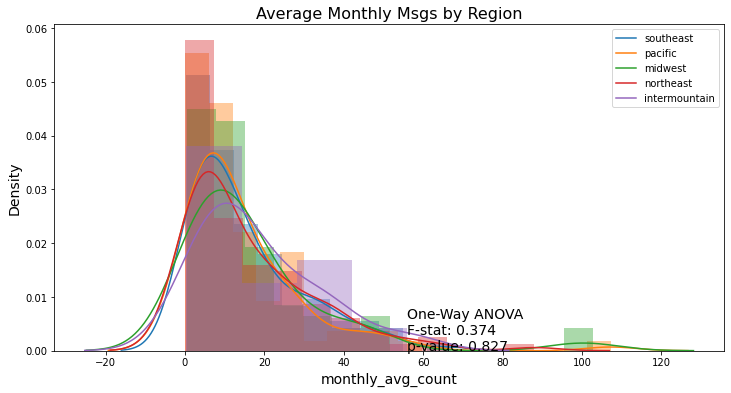




Sample Size of southeast Customers Who Used Calls: 142
Sample Size of pacific Customers Who Used Calls: 109
Sample Size of midwest Customers Who Used Calls: 71
Sample Size of northeast Customers Who Used Calls: 139
Sample Size of intermountain Customers Who Used Calls: 20


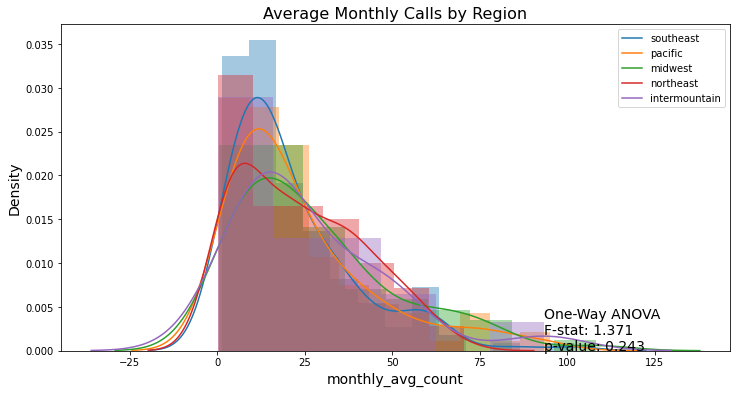




Sample Size of southeast Customers Who Used Mins: 142
Sample Size of pacific Customers Who Used Mins: 109
Sample Size of midwest Customers Who Used Mins: 71
Sample Size of northeast Customers Who Used Mins: 139
Sample Size of intermountain Customers Who Used Mins: 20


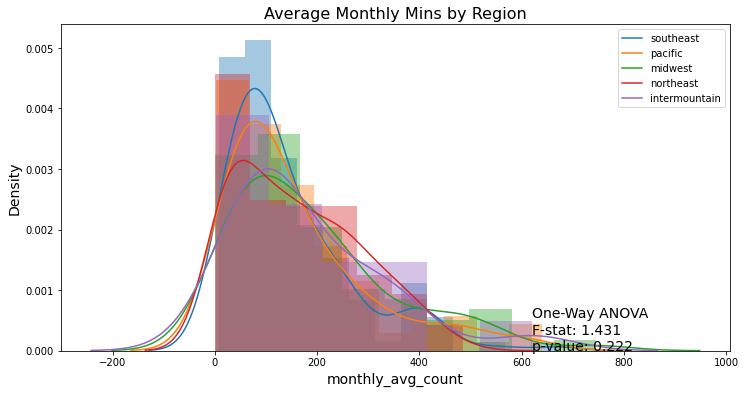




Sample Size of southeast Customers Who Used MBs: 143
Sample Size of pacific Customers Who Used MBs: 111
Sample Size of midwest Customers Who Used MBs: 74
Sample Size of northeast Customers Who Used MBs: 141
Sample Size of intermountain Customers Who Used MBs: 20


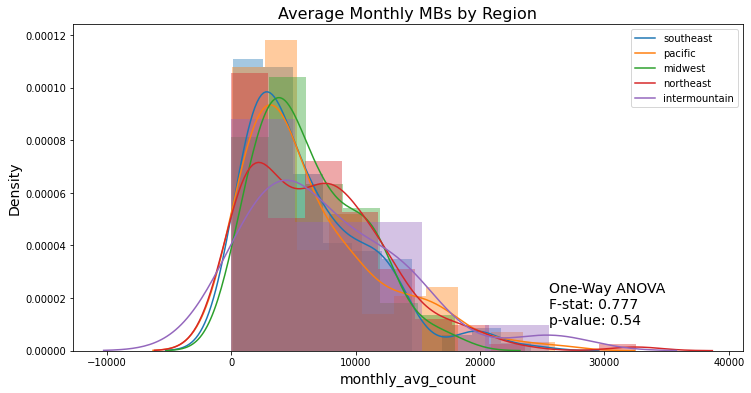

In [ ]:
pivots = [msg_count, call_count, min_count, net_count]
titles = ['Msgs', 'Calls', 'Mins', 'MBs']

for p, t in zip(pivots, titles):
  distplot(p, 'region', 'monthly_avg_count',t, 'Region')

### Inter-region T-test Function
- While the distplot visualizes some difference we can see from the ANOVA F-stat that there is no statistically significant differences between regions and there is a high probability these distribution do not represent the population - due to low and somewhat imbalanced sample sizes
- Lets try to identify some inter-region significance using students t-test

In [ ]:
def ttests(category, pivot, reg_type):
  groups = user_df[category].unique()
  ttests = []
  for i1, g1 in enumerate(groups):
    for i2, g2 in enumerate(groups):
      if i2 > i1:
        group1 = pivot[pivot[category] == g1]['monthly_avg_count']
        group2 = pivot[pivot[category] == g2]['monthly_avg_count']

        t, p = stats.ttest_ind(group1, group2)

        ttests.append([g1, g2, t.round(3), p.round(3)])

  df = pd.DataFrame(columns=[reg_type, reg_type, 't-stat', 'p-value'], data=ttests)
  return df.sort_values(by='t-stat')

In [ ]:
count_pivots = [msg_count, call_count, min_count, net_count]
titles = ['Msgs', 'Calls', 'Mins', 'MBs']
print("Bonefonni Adj P-Value:", 0.5 / len(user_df['region'].unique()))
for title, pivot in zip(titles,count_pivots):
  display(ttests('region', pivot, 'region'+title))
  print()

Bonefonni Adj P-Value: 0.1


,regionMsgs,regionMsgs,t-stat,p-value
6,pacific,intermountain,-0.894,0.373
4,pacific,midwest,-0.870,0.385
3,southeast,intermountain,-0.822,0.413
1,southeast,midwest,-0.709,0.479
5,pacific,northeast,-0.676,0.500
9,northeast,intermountain,-0.526,0.600
2,southeast,northeast,-0.418,0.677
8,midwest,intermountain,-0.247,0.805
0,southeast,pacific,0.338,0.736
7,midwest,northeast,0.344,0.731


,regionCalls,regionCalls,t-stat,p-value
1,southeast,midwest,-2.227,0.027
4,pacific,midwest,-1.284,0.201
3,southeast,intermountain,-1.112,0.268
2,southeast,northeast,-1.090,0.276
0,southeast,pacific,-0.877,0.381
9,northeast,intermountain,-0.604,0.547
6,pacific,intermountain,-0.542,0.589
5,pacific,northeast,-0.064,0.949
8,midwest,intermountain,0.257,0.798
7,midwest,northeast,1.438,0.152


,regionMins,regionMins,t-stat,p-value
1,southeast,midwest,-2.260,0.025
4,pacific,midwest,-1.374,0.171
3,southeast,intermountain,-1.180,0.240
2,southeast,northeast,-1.136,0.257
0,southeast,pacific,-0.800,0.425
6,pacific,intermountain,-0.637,0.525
9,northeast,intermountain,-0.632,0.528
5,pacific,northeast,-0.190,0.849
8,midwest,intermountain,0.227,0.821
7,midwest,northeast,1.417,0.158


,regionMBs,regionMBs,t-stat,p-value
2,southeast,northeast,-1.388,0.166
3,southeast,intermountain,-1.228,0.221
8,midwest,intermountain,-1.154,0.251
7,midwest,northeast,-0.994,0.321
6,pacific,intermountain,-0.890,0.375
5,pacific,northeast,-0.834,0.405
9,northeast,intermountain,-0.464,0.643
0,southeast,pacific,-0.426,0.670
1,southeast,midwest,-0.199,0.843
4,pacific,midwest,0.194,0.846


## **Describe the customers' behavior - Plan Category Step 3 Conclusion**
- While there are some differences noted below under "Usage Notes" we can not reject the null hypothesis for this feature overall as there is no clear statistically signifigant differences from this sample 
- However there are some inter-region differences with moderate effect size and low p-value most notably for calls and mins Southeast and Midwest this could be used for region dependant marketing purposes
- Feature labels are imbalanced with ratio close to 1:3 & 1:6 between regions

## Overall Region Usage Notes
- Average messages between regions is extremely similar
- Cluster of Midwest users send 100 messages on average per month
- North-East and Mid-West users make the most calls
- Most South-East and Pacific users make fewer calls
- North-East and Inter-Mountain users use more monthly mb's on average 
- Messages and Megabytes are the most closely alligned given their low F-stat values
- Pacific and Inter-Mountain distributions also have more dense clusters of users at the high edge 
- Pacific and Midwest 

## **Describe the customers' behavior - Age Group Step 1**
### Overall Monthly Usage Descriptive Statistics Per Age Group



In [ ]:
count_pivots = [msg_count, call_count, min_count, net_count]
titles = ['Msgs', 'Calls', 'Mins', 'MBs']
g = user_df['age_bracket'].unique()


for t, p in zip(titles, count_pivots):
  # Copy Paste Repeat 
  print(t+" Average Monthly Usage By age_bracket")
  print("-----------------------------------")
  print(f"{g[1]} Avg Monthly {t} Count:", round(p[p['age_bracket'] == g[1]]['monthly_avg_count'].mean(), 2))
  print(f"{g[0]} Avg Monthly {t} Count:", round(p[p['age_bracket'] == g[0]]['monthly_avg_count'].mean(), 2))
  print(f"{g[2]} Avg Monthly {t} Count:", round(p[p['age_bracket'] == g[2]]['monthly_avg_count'].mean(), 2))
  print(f"{g[3]} Avg Monthly {t} Count:", round(p[p['age_bracket'] == g[3]]['monthly_avg_count'].mean(), 2), '\n')

  print(f"{g[1]} Avg Monthly {t} Std. Dev.:", round(p[p['age_bracket'] == g[1]]['monthly_avg_count'].std(), 2))
  print(f"{g[0]} Avg Monthly {t} Std. Dev.:", round(p[p['age_bracket'] == g[0]]['monthly_avg_count'].std(), 2))
  print(f"{g[2]} Avg Monthly {t} Std. Dev.:", round(p[p['age_bracket'] == g[2]]['monthly_avg_count'].std(), 2))
  print(f"{g[3]} Avg Monthly {t} Std. Dev.:", round(p[p['age_bracket'] == g[3]]['monthly_avg_count'].std(), 2),'\n')

  print(f"{g[1]} Avg Monthly {t} Variance:", round(p[p['age_bracket'] == g[1]]['monthly_avg_count'].var(), 2))
  print(f"{g[0]} Avg Monthly {t} Variance:", round(p[p['age_bracket'] == g[0]]['monthly_avg_count'].var(), 2))
  print(f"{g[2]} Avg Monthly {t} Variance:", round(p[p['age_bracket'] == g[2]]['monthly_avg_count'].var(), 2))
  print(f"{g[3]} Avg Monthly {t} Variance:", round(p[p['age_bracket'] == g[3]]['monthly_avg_count'].var(),2), '\n------------------------------------\n\n')

Msgs Average Monthly Usage By age_bracket
-----------------------------------
18-35 Avg Monthly Msgs Count: 15.78
35-50 Avg Monthly Msgs Count: 16.45
50-65 Avg Monthly Msgs Count: 15.93
65+ Avg Monthly Msgs Count: 14.43 

18-35 Avg Monthly Msgs Std. Dev.: 17.1
35-50 Avg Monthly Msgs Std. Dev.: 17.29
50-65 Avg Monthly Msgs Std. Dev.: 15.66
65+ Avg Monthly Msgs Std. Dev.: 12.03 

18-35 Avg Monthly Msgs Variance: 292.34
35-50 Avg Monthly Msgs Variance: 298.86
50-65 Avg Monthly Msgs Variance: 245.16
65+ Avg Monthly Msgs Variance: 144.69 
------------------------------------


Calls Average Monthly Usage By age_bracket
-----------------------------------
18-35 Avg Monthly Calls Count: 24.34
35-50 Avg Monthly Calls Count: 23.26
50-65 Avg Monthly Calls Count: 25.06
65+ Avg Monthly Calls Count: 21.85 

18-35 Avg Monthly Calls Std. Dev.: 21.27
35-50 Avg Monthly Calls Std. Dev.: 19.63
50-65 Avg Monthly Calls Std. Dev.: 18.81
65+ Avg Monthly Calls Std. Dev.: 18.84 

18-35 Avg Monthly Calls Varian

Sample Size of 35-50 Customers Who Used Msgs: 97
Sample Size of 18-35 Customers Who Used Msgs: 137
Sample Size of 50-65 Customers Who Used Msgs: 103
Sample Size of 65+ Customers Who Used Msgs: 65


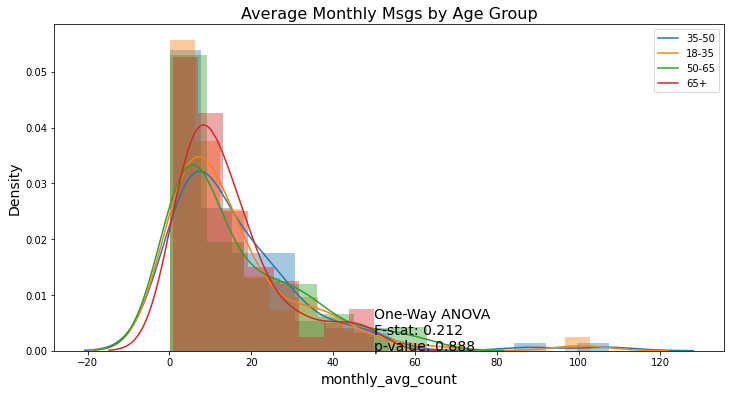




Sample Size of 35-50 Customers Who Used Calls: 117
Sample Size of 18-35 Customers Who Used Calls: 163
Sample Size of 50-65 Customers Who Used Calls: 124
Sample Size of 65+ Customers Who Used Calls: 77


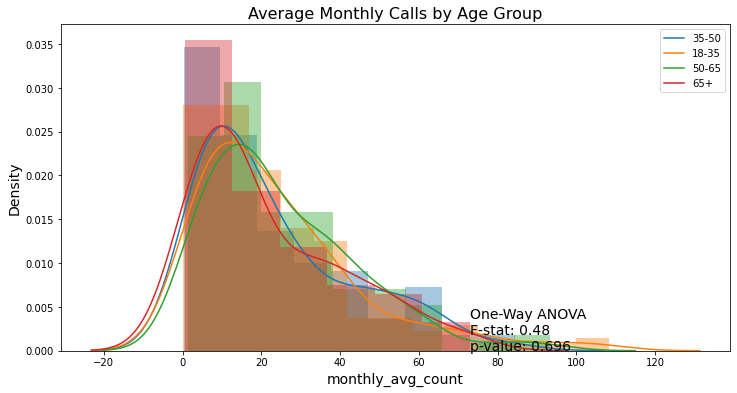




Sample Size of 35-50 Customers Who Used Mins: 117
Sample Size of 18-35 Customers Who Used Mins: 163
Sample Size of 50-65 Customers Who Used Mins: 124
Sample Size of 65+ Customers Who Used Mins: 77


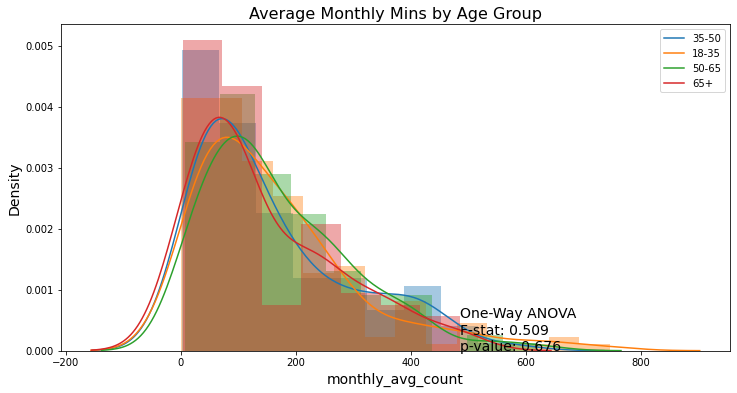




Sample Size of 35-50 Customers Who Used MBs: 120
Sample Size of 18-35 Customers Who Used MBs: 165
Sample Size of 50-65 Customers Who Used MBs: 125
Sample Size of 65+ Customers Who Used MBs: 79


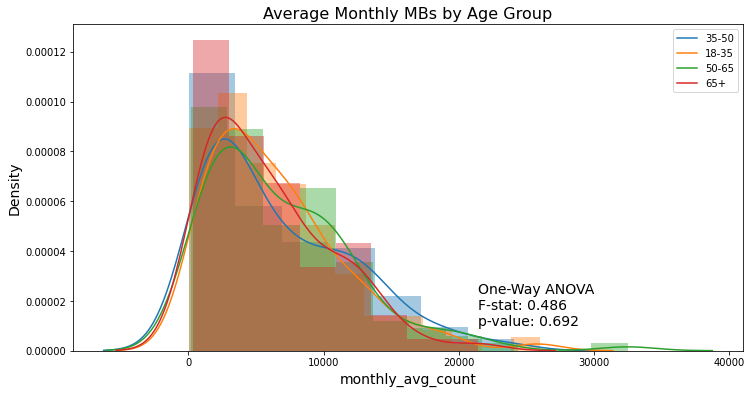

In [ ]:
pivots = [msg_count, call_count, min_count, net_count]
titles = ['Msgs', 'Calls', 'Mins', 'MBs']

for p, t in zip(pivots, titles):
  distplot(p, 'age_bracket', 'monthly_avg_count', t, 'Age Group')

In [ ]:
count_pivots = [msg_count, call_count, min_count, net_count]
titles = ['Msgs', 'Calls', 'Mins', 'MBs']
print("Bonefonni Adj P-Value:", 0.5 / len(user_df['age_bracket'].unique()))
for title, pivot in zip(titles,count_pivots):
  display(ttests('age_bracket', pivot, 'age_bracket'+title))
  print()

Bonefonni Adj P-Value: 0.125


,age_bracketMsgs,age_bracketMsgs,t-stat,p-value
3,18-35,50-65,-0.070,0.945
1,35-50,50-65,0.224,0.823
0,35-50,18-35,0.295,0.769
4,18-35,65+,0.573,0.567
5,50-65,65+,0.659,0.511
2,35-50,65+,0.819,0.414


,age_bracketCalls,age_bracketCalls,t-stat,p-value
1,35-50,50-65,-0.726,0.468
0,35-50,18-35,-0.431,0.667
3,18-35,50-65,-0.300,0.765
2,35-50,65+,0.498,0.619
4,18-35,65+,0.877,0.381
5,50-65,65+,1.176,0.241


,age_bracketMins,age_bracketMins,t-stat,p-value
1,35-50,50-65,-0.653,0.515
0,35-50,18-35,-0.378,0.706
3,18-35,50-65,-0.278,0.781
2,35-50,65+,0.613,0.540
4,18-35,65+,0.950,0.343
5,50-65,65+,1.243,0.215


,age_bracketMBs,age_bracketMBs,t-stat,p-value
3,18-35,50-65,-0.583,0.560
1,35-50,50-65,-0.212,0.833
0,35-50,18-35,0.340,0.734
4,18-35,65+,0.749,0.454
2,35-50,65+,0.952,0.342
5,50-65,65+,1.156,0.249


## **Describe the customers' behavior - Age Group Step 2 Conclusion**
- Samle sizes are relativly balanced among age groups
- Age group feature overalll has a low effect size however some slight fluctuations warrented an intergroup t-test to highoight the fluctuations 
- Interestingly enough the 55-65 group tend to make more calls and use more megabytes than most, including the 18-35 demographic
- Conversly the 65+ consume the least across all metrics conpared to all other age groups they also represent the lowest label count across all metrics with fewer 65+ sending text messages than any other group


# **3. Describe The Customers' Behavior Conclusion**
Plan Category
- Clear usage increase as the year progresses with many of these users seeming to sign on around April and beyond
    - The sampling method used appears to be biased towards new customers
- Ultimate users send more more messages per month on average, however, there is more spread/variance among this group than with surf users
- Average call counts is almost identical across both plan categories in terms of quantity and spread. However surf users make longer calls on average though their usage is more varied
- Conversly to average minutes ultimate users spend longer online using moire mbs on average
- Though usage across the 4 metrics appears to have slight impact, in particular for minutes and mbs, the sample size appears too small, imbalanced, and potentially biased towards new users to be able to reject the null hypthiesis (no correlation between plan category and usage pattern)

Age Group
- Samle sizes are relativly balanced among age groups
- Age group feature overalll has a low effect size however some slight fluctuations warrented an intergroup t-test to highoight the fluctuations 
- Interestingly enough the 55-65 group tend to make more calls and use more megabytes than most, including the 18-35 demographic
- Conversly the 65+ consume the least across all metrics conpared to all other age groups they also represent the lowest label count across all metrics with fewer 65+ sending text messages than any other group

Region
- While there are some differences noted above in "Usage Notes" we can not reject the null hypothesis for this feature overall as there is no clear statistically signifigant differences from this sample 
- However there are some inter-region differences with moderate effect size and low p-value most notably for calls and mins Southeast and Midwest this could be used for region dependant marketing purposes
- Feature labels are imbalanced with ratio close to 1:3 & 1:6 between regions




# **4. Caluating Revenue**
- Returning to the mins dataset we will round up minutes from each call and use our pivto table to return a rounded useage dataset
- For megabytes we round the total monthly amount of data used for each customer meaning we can run our current megabytes pivot table
- Then we subtract the free package limit from the total number of calls, text messages, and data then multiply the result by the calling plan value. Finally, adding the monthly charge depending on the calling plan


**Megaline Rounding Policy**
- Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.


In [ ]:
call_df['duration'] = np.ceil(call_df['duration']).astype(int)

rounded_mins_pivot = monthly_usage(call_df, 'call_date', 'duration', 'sum')
rounded_mins_pivot.head()

month,1,2,3,4,5,6,7,8,9,10,11,12,monthly_avg_count,plan_category,plan_base_price,age_bracket,region
user_id,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,124,10.33,ultimate,70,35-50,southeast
1001,0,0,0,0,0,0,0,182,315,393,426,412,144.00,surf,50,18-35,pacific
1002,0,0,0,0,0,0,0,0,0,59,386,384,69.08,surf,50,35-50,pacific
1003,0,0,0,0,0,0,0,0,0,0,0,1104,92.00,surf,50,50-65,midwest
1004,0,0,0,0,193,275,381,354,301,365,476,427,231.00,surf,50,35-50,pacific


In [ ]:
dfs = [rounded_mins_pivot, msg_count, net_count]
for df in dfs:
  for month in months:
    df.loc[df[month] == 0.00, month] = np.nan

In [ ]:
rounded_mins_pivot.head()

month,1,2,3,4,5,6,7,8,9,10,11,12,monthly_avg_count,plan_category,plan_base_price,age_bracket,region
user_id,,,,,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0,10.33,ultimate,70,35-50,southeast
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.0,315.0,393.0,426.0,412.0,144.00,surf,50,18-35,pacific
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,386.0,384.0,69.08,surf,50,35-50,pacific
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1104.0,92.00,surf,50,50-65,midwest
1004,NaN,NaN,NaN,NaN,193.0,275.0,381.0,354.0,301.0,365.0,476.0,427.0,231.00,surf,50,35-50,pacific


# Function To Convert Usage Pivots to To Excess Cost
- Using Megaline Rounding Policy
- Calculating average excess here and will combine messages, mins, and data excess into a total tariff pivot table




In [ ]:
def calc_extra_cost(pivot, surf_lim, ultim_lim, surf_excharge, 
                    ultim_excharge, excharge_col):


  
  # If megabytes round up to the next thousand
  if str(pivot) == 'net_count':
    pivot[months] = pivot[months].apply(lambda x: np.ceil(x.astype(int) / 1024) * 1000)

  # Splitting the numerics columns for conversion
  numerics = pivot.select_dtypes(include=['int', 'float'])
  objects = pivot.select_dtypes(include=['object'])

  numerics['plan_base_limit'] = numerics['plan_base_price'].replace({50:surf_lim, 70:ultim_lim})
  numerics[excharge_col] = numerics['plan_base_limit'].replace({surf_lim:surf_excharge, ultim_lim:ultim_excharge})

  # Subracting the monthly limit from the total monthly usage and replacing negative values with 0
  numerics[months] = numerics[months].subtract(numerics['plan_base_limit'], axis=0)
  numerics[numerics[months] < 0] = 0

  # Summing the total amount of usage over the limit and its total cost into columns)
  numerics[months] = numerics[months].mul(numerics[excharge_col], axis=0).round(2)

  numerics['monthly_avg_extra_cost'] =  round(numerics[months].mean(axis=1),2) 

  # Removing columns used for calulting monthly costs
  numerics = numerics.drop(['plan_base_price', 'monthly_avg_count', 'plan_base_limit', excharge_col], axis=1)
  pivot = pd.concat([numerics, objects],axis=1)

  return pivot

In [ ]:
# df, date_col, agg_val, agg_func, surf_lim, ultim_lim, surf_charge, unlim_charge, extra_charge_col, extra_count_col, total_extra
msg_charges = calc_extra_cost(msg_count, 50, 1000, 0.03, 0.01, 'extra_msg_charge')
rounded_mins_charges = calc_extra_cost(rounded_mins_pivot, 500, 3000, 0.03, 0.01, 'extra_min_charge')
mb_charges= calc_extra_cost(net_count, 15000, 30000, 0.01, 0.007, 'extra_mb_charge')

In [ ]:
msg_charges.head()

month,1,2,3,4,5,6,7,8,9,10,11,12,monthly_avg_extra_cost,plan_category,age_bracket,region
user_id,,,,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,ultimate,35-50,southeast
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.09,0.0,0.0,0.02,surf,18-35,pacific
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.0,0.00,surf,35-50,pacific
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,surf,50-65,midwest
1004,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,surf,35-50,pacific


In [ ]:
rounded_mins_charges.head()

month,1,2,3,4,5,6,7,8,9,10,11,12,monthly_avg_extra_cost,plan_category,age_bracket,region
user_id,,,,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,ultimate,35-50,southeast
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.00,0.00,surf,18-35,pacific
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,0.00,surf,35-50,pacific
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.12,18.12,surf,50-65,midwest
1004,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,surf,35-50,pacific


In [ ]:
mb_charges.head()

month,1,2,3,4,5,6,7,8,9,10,11,12,monthly_avg_extra_cost,plan_category,age_bracket,region
user_id,,,,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,ultimate,35-50,southeast
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,73.3,35.04,43.69,30.41,surf,18-35,pacific
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,43.45,0.00,14.48,surf,35-50,pacific
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.44,120.44,surf,50-65,midwest
1004,NaN,NaN,NaN,NaN,0.0,56.73,95.17,129.82,38.53,0.0,68.51,63.89,56.58,surf,35-50,pacific


# Creating a total charges data frame 
- Total per month 
- Monthly Average
- Lets quickly see which dataset has the most ids

In [ ]:
# Here is were we look for unique ids
print('length mb_charges:',len(mb_charges))
print('length mins_charges:', len(rounded_mins_charges))
print('length msgs charges:', len(msg_charges))
# list((set(mb_charges.index) | set(rounded_mins_charges.index) | set(msg_charges.index)) - (set(mb_charges.index) & set(rounded_mins_charges.index) & set(msg_charges.index)))
# list((set(mb_charges.index) | set(rounded_mins_charges.index)) - (set(mb_charges.index) & set(rounded_mins_charges.index)))
# mb_charges[mb_charges.index == 1089]

length mb_charges: 489
length mins_charges: 481
length msgs charges: 402


- The code aboce indicates that the mb_charges contains the most user
- 8 customers only use Megalines service as a modem
- highest mb useage is in intermountain and northeast regions

## Back to creating a total charge pivot
- using mb_charges pivot as the base we will add to calls and msgs to it

In [ ]:
total_charges = mb_charges[months].add(rounded_mins_charges[months], axis=0, fill_value=0).add(msg_charges[months], axis=0, fill_value=0)
total_charges['plan_category'] = total_charges.index.map(user_plan_dict)
total_charges['plan_base_price'] = total_charges['plan_category'].replace({"surf":50, 'ultimate':70})


total_charges[months] = total_charges[months].add(total_charges['plan_base_price'], axis=0)
total_charges['monthly_avg_charges'] = round(total_charges[months].mean(axis=1),2)

total_charges['state'] = total_charges.index.map(user_state_dict)
total_charges['region'] = total_charges.index.map(user_region_dict)


total_charges.head()

# plot reg date count

month,1,2,3,4,5,6,7,8,9,10,11,12,plan_category,plan_base_price,monthly_avg_charges,state,region
user_id,,,,,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.00,ultimate,70,70.00,GA,southeast
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.00,50.00,123.39,85.04,93.69,surf,50,80.42,WA,pacific
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.00,93.45,50.00,surf,50,64.48,NV,pacific
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,188.56,surf,50,188.56,OK,midwest
1004,NaN,NaN,NaN,NaN,50.0,106.73,145.17,179.82,88.53,50.00,118.51,113.89,surf,50,106.58,WA,pacific


## **4. Calculating Total Revenue Conclusion**
- Merge worked as expected
- user averages are calculated based only on active months
- Averages are accurate


# **Does The Average Revenue Differ Between Plans?**
- The null hypthesis - assumes no relationship between plan category and average monthly tariff
- The alternative hypothesis - assumes relationship between plan category and average monthly tariff
- This is a two tailed test - we dont care if one is higher or lower we are just interested in if there is a difference
- We can use the standard alpha of 0.05 and divide by two for two-tailed test
- Lets describe the total tariff for both plans first

In [ ]:
total_charges[total_charges['plan_category'] == 'surf'].describe().round()

month,1,2,3,4,5,6,7,8,9,10,11,12,plan_base_price,monthly_avg_charges
count,2.0,9.0,23.0,50.0,77.0,97.0,121.0,162.0,194.0,237.0,283.0,318.0,333.0,333.0
mean,50.0,65.0,76.0,71.0,78.0,79.0,93.0,94.0,88.0,95.0,88.0,100.0,50.0,88.0
std,0.0,21.0,40.0,35.0,45.0,45.0,55.0,61.0,48.0,57.0,51.0,69.0,0.0,44.0
min,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
25%,50.0,50.0,50.0,50.0,50.0,50.0,51.0,50.0,50.0,50.0,50.0,54.0,50.0,58.0
50%,50.0,60.0,50.0,50.0,52.0,57.0,71.0,70.0,71.0,78.0,70.0,81.0,50.0,77.0
75%,50.0,63.0,90.0,79.0,105.0,86.0,116.0,117.0,111.0,117.0,109.0,120.0,50.0,102.0
max,50.0,104.0,203.0,185.0,269.0,271.0,290.0,418.0,274.0,369.0,329.0,630.0,50.0,354.0


In [ ]:
total_charges[total_charges['plan_category'] == 'ultimate'].describe().round()

month,1,2,3,4,5,6,7,8,9,10,11,12,plan_base_price,monthly_avg_charges
count,4.0,7.0,12.0,21.0,29.0,47.0,59.0,71.0,86.0,106.0,127.0,151.0,157.0,157.0
mean,70.0,70.0,75.0,73.0,71.0,72.0,72.0,73.0,72.0,72.0,72.0,74.0,70.0,72.0
std,0.0,0.0,12.0,12.0,4.0,9.0,11.0,13.0,9.0,13.0,10.0,15.0,0.0,8.0
min,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0
25%,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0
50%,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0
75%,70.0,70.0,72.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0
max,70.0,70.0,112.0,124.0,90.0,125.0,132.0,143.0,123.0,186.0,161.0,184.0,70.0,124.0


- We can see that surf users have much higher charges resulting in an average monbthly tariff of 88 USD which is 16 USD more per month than ultimate users who cost around 72 USD on average 
- Lets perform a t-test now to see if the sizes and distributions of these samples are statisically significant and reflective of the population
- We can see significantly higher variance in surf user costs so we will set equal_var to False

In [ ]:
surf_list = total_charges[total_charges['plan_category'] == 'surf']['monthly_avg_charges']
ulti_list = total_charges[total_charges['plan_category'] == 'ultimate']['monthly_avg_charges']

surf_monthly_average_total_charge = round(sum(surf_list) / len(surf_list),2)
ultimate_monthly_average_total_charges = round(sum(ulti_list) / len(ulti_list),2)

textstr = 'Average Mothly Surf Charge: $'+str(surf_monthly_average_total_charge)+'\n'
textstr +='Average Monthly Ultimate Charge: $'+str(ultimate_monthly_average_total_charges)+'\n\n'


t_stat, p_value = stats.ttest_ind(surf_list, ulti_list, equal_var=False)
  
textstr += 'Students T-test:\nt-stat: {} p-value: {}'.format(round(t_stat,3), round(p_value,5))

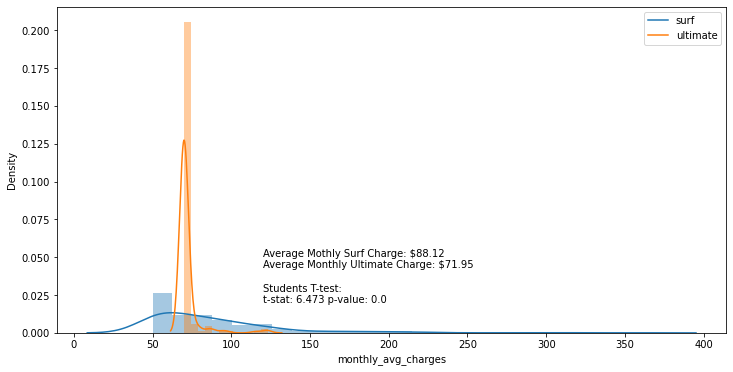

In [ ]:
plt.figure(figsize=(12,6))
print()
sns.distplot(surf_list)
sns.distplot(ulti_list)
plt.text(120, 0.020, textstr)
plt.legend(['surf', 'ultimate'])
plt.show()

# **Does The Average Revenue Differ Between Plans Conclusion**
- Surf users cost on average 16 USD more per month than ultimate users
- Surf users tend to exceed there limits and create high monthly tariffs 
- We also see a much higher dispersion of charges among surf users with Std. Dev. 44 USD versus 8 USD for ultimate users
- Checking the T-stat and p-value against students ttest table we can see this is a statistically significant distribution and we can be confident to see the same or very similar results reflected in Megalines total customer base
- Students ttest table https://www.itl.nist.gov/div898/handbook/eda/section3/eda3672.htm
- Side note - if the plan ratio of this sample is reflective of Megalines overall customer plan ratio then there are alsdo more the 2x the number of surf users futher increasing Megaline surf plan revenue 


# **Does the average revenue from users in NY-NJ area differ from other areas**
- The null hypthesis - assumes no relationship between state and average monthly tariff
- The alternative hypothesis - assumes relationship between state and average monthly tariff
- This is a two tailed test - we dont care if one is higher or lower we are just interested in if there is a difference
- We can use the standard alpha of 0.05 and divide by two for two-tailed test
- However lets also calculate the Bonferonni Adj. P-value 0.05 / len(t-tests)


In [ ]:
NYNJ = total_charges[total_charges['state'] == 'NY-NJ-PA']['monthly_avg_charges']
states = total_charges[total_charges['state'] != 'NY-NJ-PA']['state'].unique()



data = []
for state in states:
  state_2_count = len(total_charges[total_charges['state'] == state].index)
  t, p = stats.ttest_ind(NYNJ, total_charges[total_charges['state'] == state]['monthly_avg_charges'], equal_var=False)
  data.append(['NY-NJ-PA', state, state_2_count, t.round(2), p.round(5)])

ttest_df = pd.DataFrame(data, columns=['State_1','State_2', 'State_2_Count','T-Stat', 'P-Value'])
ttest_df = ttest_df.sort_values(by=['P-Value', 'T-Stat'], ascending=True).reset_index(drop=True)

print('Two tailed t-test P-value: {}'.format(round(0.05/2, 4)))
print()
print('Bonferonni Adj. P-value: {}'.format(round(0.05 / len(ttest_df['State_2']),4)))
print()
print('Number of States With Lower Average Monthly Revenue Than NY-NJ: {}\nNumber of States With Higher Average Monthly Revenue Than NY-NJ: {}'. format(len(ttest_df[ttest_df['T-Stat'] < 0]), len(ttest_df[ttest_df['T-Stat'] > 0])))
ttest_df.head(50)  

Two tailed t-test P-value: 0.025

Bonferonni Adj. P-value: 0.0012

Number of States With Lower Average Monthly Revenue Than NY-NJ: 18
Number of States With Higher Average Monthly Revenue Than NY-NJ: 23


,State_1,State_2,State_2_Count,T-Stat,P-Value
0,NY-NJ-PA,NE-IA,2,8.84,0.00000
1,NY-NJ-PA,NM,2,-3.79,0.00035
2,NY-NJ-PA,SC,7,2.87,0.00822
3,NY-NJ-PA,VA,4,3.37,0.01342
4,NY-NJ-PA,NV,7,2.51,0.02149
5,NY-NJ-PA,IN,6,2.27,0.04301
6,NY-NJ-PA,VA-NC,4,1.92,0.07177
7,NY-NJ-PA,NC,2,3.56,0.08346
8,NY-NJ-PA,IL-IN-WI,19,1.66,0.10287
9,NY-NJ-PA,TN-MS-AR,2,1.58,0.20276


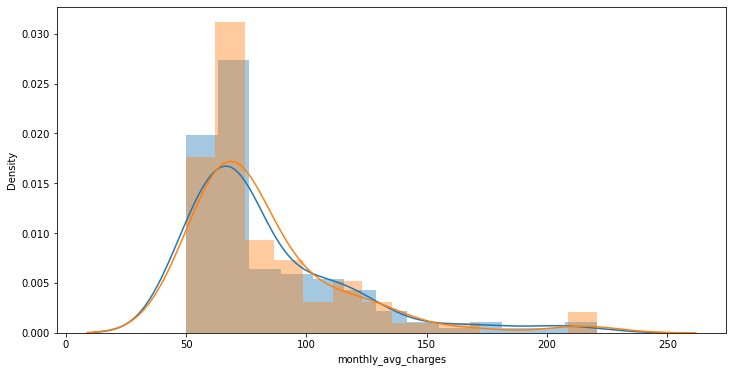

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(total_charges[total_charges['region'] == 'northeast']['monthly_avg_charges'])
sns.distplot(total_charges[total_charges['state'] == 'NY-NJ-PA']['monthly_avg_charges'])

In [ ]:
print(total_charges[total_charges['state'] == 'NY-NJ-PA']['plan_category'].value_counts())
total_charges[total_charges['state'] == 'NY-NJ-PA'].describe()

surf        60
ultimate    19
Name: plan_category, dtype: int64


month,1,2,3,4,5,6,7,8,9,10,11,12,plan_base_price,monthly_avg_charges
count,0.0,2.000000,6.000000,14.000000,18.000000,25.000000,33.000000,41.000000,47.000000,53.000000,62.000000,76.000000,79.000000,79.000000
mean,NaN,74.110000,70.496667,68.579286,76.276111,72.342000,78.522424,84.341220,85.827872,93.987358,90.602419,87.052632,54.810127,82.695316
std,NaN,34.096689,28.677742,29.346334,32.102668,35.658979,32.923770,41.252332,41.369468,49.581416,52.815249,45.695826,8.602438,32.872148
min,NaN,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
25%,NaN,62.055000,50.000000,50.000000,50.000000,50.000000,50.000000,50.450000,54.020000,62.580000,51.125000,63.485000,50.000000,65.030000
50%,NaN,74.110000,55.060000,51.800000,60.205000,52.160000,70.000000,70.000000,73.530000,73.030000,70.000000,70.000000,50.000000,70.000000
75%,NaN,86.165000,88.110000,69.602500,100.572500,79.050000,98.160000,112.090000,90.065000,105.810000,104.145000,92.652500,50.000000,92.205000
max,NaN,98.220000,115.420000,133.830000,139.110000,194.790000,149.720000,248.160000,232.590000,239.180000,262.590000,319.250000,70.000000,220.720000


In [ ]:
print(total_charges[total_charges['state'] == 'SC']['plan_category'].value_counts())
total_charges[total_charges['state'] == 'SC']

ultimate    5
surf        2
Name: plan_category, dtype: int64


month,1,2,3,4,5,6,7,8,9,10,11,12,plan_category,plan_base_price,monthly_avg_charges,state,region
user_id,,,,,,,,,,,,,,,,,
1061,NaN,NaN,NaN,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.00,ultimate,70,70.00,SC,southeast
1148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,82.40,surf,50,66.20,SC,southeast
1225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.00,surf,50,50.00,SC,southeast
1283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,91.47,ultimate,70,80.74,SC,southeast
1329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,70.0,70.0,70.0,70.00,ultimate,70,70.00,SC,southeast
1347,NaN,NaN,NaN,NaN,NaN,NaN,70.0,70.0,70.0,70.0,70.0,70.00,ultimate,70,70.00,SC,southeast
1376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,70.00,ultimate,70,70.00,SC,southeast


In [ ]:
print(total_charges[total_charges['state'] == 'SC']['plan_category'].value_counts())
total_charges[total_charges['state'] == 'NV']

ultimate    5
surf        2
Name: plan_category, dtype: int64


month,1,2,3,4,5,6,7,8,9,10,11,12,plan_category,plan_base_price,monthly_avg_charges,state,region
user_id,,,,,,,,,,,,,,,,,
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.00,93.45,50.00,surf,50,64.48,NV,pacific
1041,NaN,NaN,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.00,70.00,70.00,ultimate,70,70.00,NV,pacific
1186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.00,ultimate,70,70.00,NV,pacific
1288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.00,50.00,50.00,surf,50,50.00,NV,pacific
1330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.00,70.00,ultimate,70,70.00,NV,pacific
1425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,82.66,135.76,80.01,surf,50,87.11,NV,pacific
1462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.00,70.00,70.00,ultimate,70,70.00,NV,pacific


# **Does the average revenue from users in NY-NJ area differ from other areas Conclusion**
- Average revenue from NY-NJ is higher than NE-IA, SC, VA, and NV and lower than NM
- The most robust comparisons can be made between SC and NV which have 7 enteries each
- In total there are 18 states whose T-stat indicates they have a lower average monthly revenue and 23 who have a higher average 
- Overall though, despite some low p-values, most sample sizes, especially among states with the largest effect size versus NY-NJ are too small to draw conclusions
- Most states do not have a statisically significant effect size on revenue
- Seems that states with less ultimate users bring in less revenue as surf users, despite lower base tariff, cost more on average reg


# **Appendix - Average Cost by Existing/Churned Customer**
- Final EDA section for the earlier churn

In [ ]:
churned_dict = dict(zip(user_df['user_id'], user_df['isChurned']))
total_charges['isChurned'] = total_charges.index.map(churned_dict)

print('Average Monthly Charge Existing Customer: $'+str(round(sum(total_charges[total_charges['isChurned'] == 0]['monthly_avg_charges']) / len(total_charges[total_charges['isChurned'] == 0]['monthly_avg_charges']),2)))
print('Average Monthly Charge Churned Customer: $'+str(round(sum(total_charges[total_charges['isChurned'] == 1]['monthly_avg_charges']) / len(total_charges[total_charges['isChurned'] == 1]['monthly_avg_charges']),2)))

Average Monthly Charge Existing Customer: $83.0
Average Monthly Charge Churned Customer: $82.03


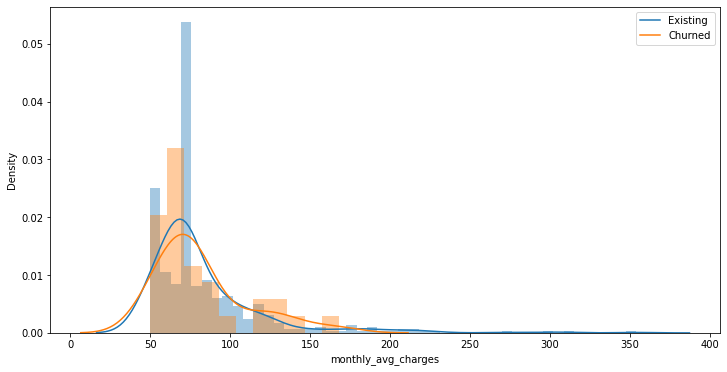

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(total_charges[total_charges['isChurned'] == 0]['monthly_avg_charges'])
sns.distplot(total_charges[total_charges['isChurned'] == 1]['monthly_avg_charges'])
plt.legend(['Existing', 'Churned'])

- While existing customers have a slightly higher monthly average 83 USD compared to Ultimate user 82 USD when the distribution of monthly charges is plotted we can see that a group of users who churned that had average monthly charges around 120-170 USD
- However there are other factors at play as we can also see considerable amount of churned users who have average monthly charges of 50-100 USD

# **Overall Conclusion**
## Preprocessing
- 3 useage dataset, 1 Customer infomation dtaset, 1 plan information dataset
The three plan usage datasets are similarly formatted
- Pivoted the datasets in order to perform analysis by date
- Some inconsistent user_ids across the datasets e.g. many more customers used megabytes but not messages
- Customer infomation dates columns indicate many users signed on throughout the year while na churn dates indicate they are still customers 

## Churn
- Churners only account for 6.8% of the dataset
- Highest regitration months are June and August while highest churn rates are in November December and among churners the average lifetime is 141 days from registration to churn
- 18-35 year-olds have trhe highest churn rate of 29%-43% higher than other age groups and may acount for purchase and churn spikes in June/August and November december
- Southern states and Southern region has the highest counts of customers /churners
- Overall state and region population appears to play a part in customer count but customer count does not appear to impact churn ratio
- While existing customers have a slightly higher monthly average 83 USD compared to Ultimate user 82 USD when the distribution of monthly charges is plotted we can see that a group of users who churned that had average monthly charges around 120-170 USD
- However there are other factors at play as we can also see considerable amount of churned users who have average monthly charges of 50-100 USD


## Describe Customer Behavior 
### Usage by Plan Cat/State/Region/Age 
- **Overall usage is much the same across all features in the dataset below is a list of some noted differences**
- Ultimate users send more more messages per month on average, however, there is more spread/variance among this group than with surf users
- Average call counts is almost identical across both plan categories in terms of quantity and spread. However surf users make longer calls on average and their usage is also more varied
- Conversly to average minutes - ultimate users spend longer online using more mbs on average
- Though usage across the 4 metrics appears to have slight distinctios between plan categories, in particular for minutes and mbs, the t-stat is too low and p-value too high to be able to reject the null hypthiesis. Resampling is likely to produce varied results, the sample size may be too small, imbalanced towards surf users (unless this ratio represents the Megalines customer population - unclear) 

Age
- Samle sizes are relativly balanced among age groups
- Age group feature overalll has a low effect size however some slight fluctuations warrented an intergroup t-test to highoight the fluctuations 
- Interestingly enough the 55-65 group tend to make more calls and use more megabytes than most, including the 18-35 demographic
- Conversly the 65+ consume the least across all metrics conpared to all other age groups they also represent the lowest label count across all metrics with fewer 65+ sending text messages than any other group

Region
- While there are some differences noted below at stage 3 "Usage Notes" overall we can not reject the null hypothesis for this feature as there is no clear statistically signifigant differences among the region feature as a whole
- However there are some inter-region differences with moderate effect size most notably for calls and mins bwteen Southeast and Midwest ith the latter spending making more call and longer calls this could be used for region dependant marketing purposes
- Overall feature labels are imbalanced with ratio close to 1:3 & 1:6 between regions with the fewesr customer in the intermountain and midwest regions - lower populations/worse service/regional advertising limitations?


## Does Average Revenue Differ Between Plans
- **Yes surf users create more revenue despite a lower base tariff**
- Surf users cost on average 16 USD more per month than ultimate users
- Surf users tend to exceed there limits and create high monthly tariffs
- We also see a much higher dispersion of charges among surf users with Std. Dev. 44 USD versus 8 USD for ultimate users
- Checking the T-stat and p-value against students ttest table we can see this is a statistically significant distribution and we can be confident to see the same or very similar results reflected in Megalines total customer base
Students ttest table https://www.itl.nist.gov/div898/handbook/eda/section3/eda3672.htm
- Side note - if the plan ratio of this sample is reflective of Megalines overall customer plan ratio then there is also more the 2x the number of surf users futher increasing Megaline surf plan revenue


## Does the average revenue from users in NY-NJ area differ from other areas 
- **Yes average revenue is higher here than in several states however sample size is an issue**
- Average revenue from NY-NJ is higher than NE-IA, SC, VA, and NV and lower than NM
- The most robust comparisons can be made between SC and NV which have 7 enteries each as opposed to the two by other states with high t_stats
- In total there are 18 states whose T-stat indicates they have a lower average monthly revenue and 23 who have a higher average
- Overall though, despite some low p-values, most sample sizes, especially among states with the largest effect size versus NY-NJ are too small to draw conclusions
- Most states do not have a statisically significant effect size on revenue
- States with less ultimate users bring in less revenue as surf users who, despite having lower base tariff, cost more on average due to excess charge
